<a href="https://colab.research.google.com/github/ivonnecastao/ml-lab01/blob/main/Circutos_Cu%C3%A1nticos_Mayo_15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install qiskit ipywidgets


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 36.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 84.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.5/241.5 kB 21.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 76.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.5/37.5 MB 19.1 MB/s eta 0:00:00


In [2]:
!pip install pylatexenc

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136820 sha256=4687a9e2deac4c56dea45cb407b29e71d15b733fc7aea9186244c7248f662068
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc


In [3]:
from qiskit import QuantumCircuit, assemble, execute, QuantumRegister, ClassicalRegister
from qiskit.visualization import plot_histogram
from qiskit.visualization.state_visualization import plot_bloch_multivector
from math import sqrt, pi
from qiskit.providers.aer import Aer
from qiskit.visualization import array_to_latex

In [6]:
q = QuantumRegister(1, "qreg")  #crea el registro cuántico que tiene 1 qbit y se llamará qreg
qc = QuantumCircuit(q)  #crea el circuito cuántico
print("Circuito cuántico creado")
qc.draw(initial_state=True)

Circuito cuántico creado


qreg: |0>

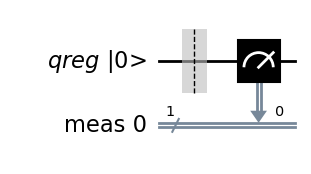

In [7]:
q = QuantumRegister(1, "qreg")
qc = QuantumCircuit(q)
qc.measure_all()     # mida todos los qbits de circuito
qc.draw("mpl", initial_state=True) #dibujo el circuito  mpl es para dibujar el circuito con mathplotlib

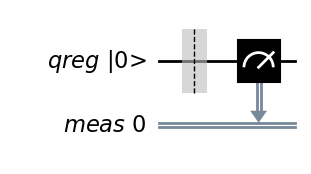

In [8]:
q = QuantumRegister(1, "qreg")
qc = QuantumCircuit(q)
qc.measure_all()
qc.draw("mpl", initial_state=True, cregbundle=False)

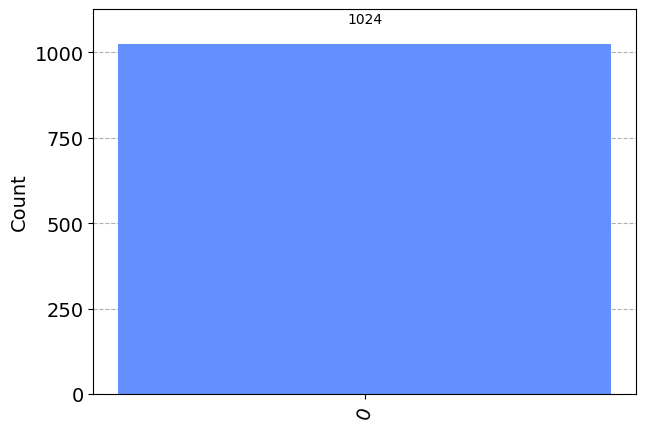

In [9]:
q = QuantumRegister(1, "qreg")
qc = QuantumCircuit(q)
qc.measure_all()

sim = Aer.get_backend('aer_simulator')  # Este es el simulador de IBM que podemos instancias
result = sim.run(qc).result()    # ejecuta la simulación, por defecto son 1024 shots o conteos
counts = result.get_counts()     # muestra los conteos de la medición 
plot_histogram(counts)           # pinta el histograma de los conteos

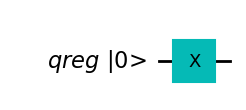

In [10]:
q = QuantumRegister(1, "qreg")
qc = QuantumCircuit(q)
qc.x(0)                               # Forma en la cual aplico las diferentes compuertas, en este caso aplique X al qbit 0
qc.draw("mpl", initial_state=True)    # Dibuje

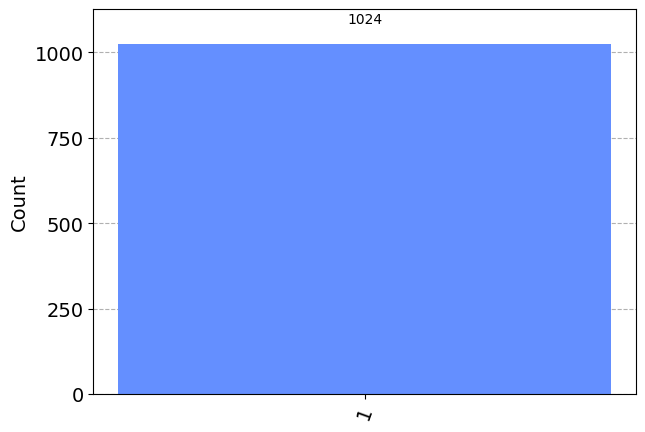

In [11]:
q = QuantumRegister(1, "qreg")
qc = QuantumCircuit(q)
qc.x(0)
qc.draw("mpl", initial_state=True)
qc.measure_all()
sim = Aer.get_backend('aer_simulator') 
result = sim.run(qc).result()
counts = result.get_counts()
plot_histogram(counts)

# Aquí revisamos los conteos después de aplicar la compuerta X, ahora da 1, antes dio 0

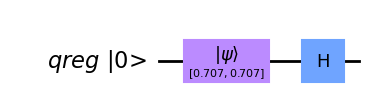

In [12]:
q = QuantumRegister(1, "qreg")
qc = QuantumCircuit(q)
initial_state = [1/sqrt(2),1/sqrt(2)]  # alfa y beta para el estado inicial, en este caso estado +
qc.initialize(initial_state, 0)        #le estoy diciendo que aplique este estado inicial al qbit que deseo, aquí al de índice 0
qc.h(0)                                # aplico el operador H
qc.draw("mpl", initial_state=True)

simulating


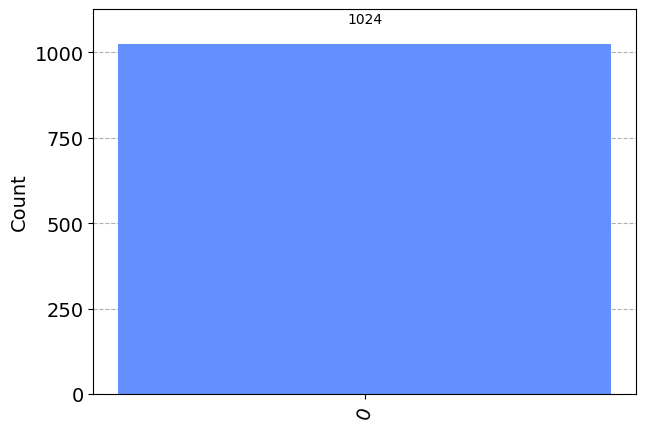

In [14]:
def counts(qc):
  print("simulating")
  sim = Aer.get_backend('aer_simulator') 
  result = sim.run(qc).result()
  counts = result.get_counts()
  return plot_histogram(counts)
  

q = QuantumRegister(1, "qreg")
qc = QuantumCircuit(q)
initial_state = [1/sqrt(2),1/sqrt(2)]
qc.initialize(initial_state, 0)
qc.h(0)
qc.measure_all()
counts(qc)

simulating


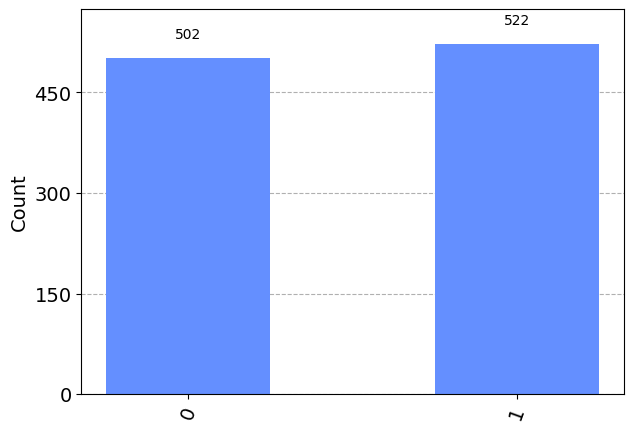

In [16]:
q = QuantumRegister(1, "qreg")
qc = QuantumCircuit(q)
initial_state = [1/sqrt(2)+0j, 0+1j/sqrt(2)]  # Inicia en Estado i+   La i de imaginario se representa como j
qc.initialize(initial_state, 0)
qc.h(0)
qc.draw("mpl", initial_state=True)
qc.measure_all()
counts(qc)

simulating


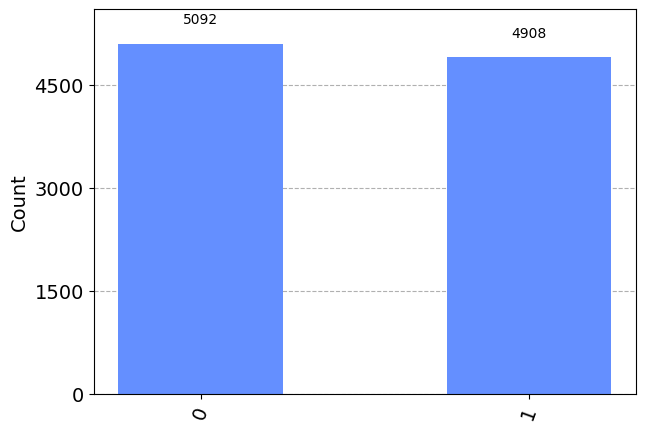

In [17]:
def counts(qc, shots=1024):
  print("simulating")
  sim = Aer.get_backend('aer_simulator') 
  result = sim.run(qc, shots=shots).result()
  counts = result.get_counts()
  return plot_histogram(counts)
  

q = QuantumRegister(1, "qreg")
qc = QuantumCircuit(q)
initial_state = [1/sqrt(2)+0j, 0+1j/sqrt(2)]
qc.initialize(initial_state, 0)
qc.h(0)
qc.measure_all()
counts(qc, 10000)


In [21]:
q = QuantumRegister(1, "qreg")
qc = QuantumCircuit(q)
initial_state = [1/sqrt(2)+0j, 0+1j/sqrt(2)]
qc.initialize(initial_state, 0)
qc.h(0)
qc.save_statevector()      # EStado vectorial es el estado final del circuito
sim = Aer.get_backend('aer_simulator') 
result = sim.run(qc).result()
states_vector = result.get_statevector()
print(states_vector)

Statevector([0.5+0.5j, 0.5-0.5j],
            dims=(2,))


In [22]:
q = QuantumRegister(1, "qreg")
qc = QuantumCircuit(q)
initial_state = [1/sqrt(2)+0j, 0+1j/sqrt(2)]
qc.initialize(initial_state, 0)
qc.h(0)
qc.save_statevector()
sim = Aer.get_backend('aer_simulator') 
result = sim.run(qc).result()
states_vector = result.get_statevector()
array_to_latex(states_vector, prefix="\\text{Statevector} = ")

<IPython.core.display.Latex object>

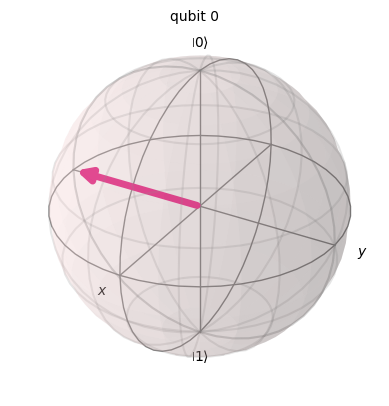

In [23]:
q = QuantumRegister(1, "qreg")
qc = QuantumCircuit(q)
initial_state = [1/sqrt(2)+0j, 0+1j/sqrt(2)]
qc.initialize(initial_state, 0)
qc.h(0)
qc.save_statevector()

sim = Aer.get_backend('aer_simulator') 
result = sim.run(qc).result()
states_vector = result.get_statevector()
plot_bloch_multivector(states_vector)


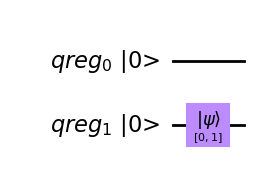

In [24]:
q = QuantumRegister(2, "qreg")
qc = QuantumCircuit(q)
one_state = [0,1]
qc.initialize(one_state, 1)
qc.draw("mpl", initial_state=True)

In [25]:
q = QuantumRegister(2, "qreg")
qc = QuantumCircuit(q)
one_state = [0,1]
qc.initialize(one_state, 1)
qc.save_statevector()

sim = Aer.get_backend('aer_simulator') 
result = sim.run(qc).result()
states_vector = result.get_statevector()
array_to_latex(states_vector, prefix="\\text{Statevector} = ")

<IPython.core.display.Latex object>

In [26]:
q = QuantumRegister(2, "qreg")
qc = QuantumCircuit(q)
one_state = [0,1]
qc.initialize(one_state, 1)
qc.z(1)
qc.x(0)
qc.save_statevector()

sim = Aer.get_backend('aer_simulator') 
result = sim.run(qc).result()
states_vector = result.get_statevector()
array_to_latex(states_vector, prefix="\\text{Statevector} = ")
#qc.draw("mpl", initial_state=True)

<IPython.core.display.Latex object>